In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train =pd.read_csv('C:\\Users\\ashish\\Desktop\\deep\\data\\Google_Stock_Price_Train.csv')

In [71]:
training_set = dataset_train.iloc[:, 1:2].values

In [72]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scalar.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
#for i in range(60, 1258):
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#3D tensor with shape(batchsize,timesteps,input_dim)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [16]:
regressor = Sequential()

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  #X_train.shape[1] is timesteps
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [21]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

W0328 15:35:19.116906 11324 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/100
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0451
Epoch 2/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0064
Epoch 3/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0062
Epoch 5/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 22s 18ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 26s 22ms/step - loss: 0.0017
Epoch 96/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0016
Epoch 97/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 25s 21ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 23s 19ms/step - loss: 0.0015


In [63]:
dataset_test = pd.read_csv('C:\\Users\\ashish\\Desktop\\deep\\data\\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2]

In [78]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scalar.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scalar.inverse_transform(predicted_stock_price)


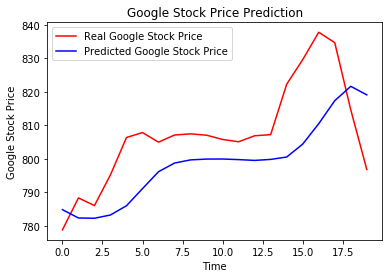

In [68]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
